# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('C:/Users/---/Desktop/Projects/Practice/365_DataScience/Bank_data.csv')

In [3]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data_dummy = data.copy()
# Removes the index column thata comes with the data
data_dummy = data_dummy.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\---\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.2121
Time:                        14:33:56   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

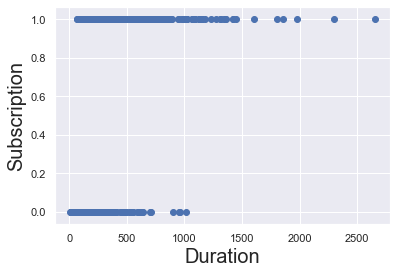

In [7]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Find the odds of duration

In [8]:
np.exp(	0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression. 

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

## Lets test the accuracy of the model

In [10]:
result_log.predict()

array([0.24936904, 0.42571348, 0.30019503, 0.85898342, 0.28956627,
       0.2580803 , 0.21914028, 0.16614452, 0.86976608, 0.31987434,
       0.55276776, 0.22532533, 0.30234734, 0.39480294, 0.35411888,
       0.489064  , 0.29167414, 0.25225084, 0.50567672, 0.82802726,
       0.84413091, 0.5890681 , 0.45848474, 0.40215497, 0.44961416,
       0.20546539, 0.4157464 , 0.42321571, 0.58286683, 0.2580803 ,
       0.17928751, 0.2580803 , 0.85711543, 0.43322907, 0.293791  ,
       0.32658401, 0.98373368, 0.21652721, 0.99665611, 0.62920727,
       0.2639969 , 0.49417474, 0.30885632, 0.27711089, 0.28746746,
       0.2474601 , 0.19643708, 0.30342677, 0.30559213, 0.4712014 ,
       0.87376626, 0.20132396, 0.22177596, 0.28642146, 0.25612742,
       0.49417474, 0.27916371, 0.20214723, 0.88872861, 0.53501481,
       0.23806331, 0.24556099, 0.90211616, 0.40092648, 0.51078751,
       0.45975425, 0.28019361, 0.30450837, 0.87432905, 0.23713725,
       0.18231618, 0.3706541 , 0.4724754 , 0.38144917, 0.54009

In [12]:
# lets format it to readable array
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
result_log.predict()

# as we can see in the below array theres 0.00-1.00 value that is the probability

array([0.25, 0.43, 0.30, 0.86, 0.29, 0.26, 0.22, 0.17, 0.87, 0.32, 0.55,
       0.23, 0.30, 0.39, 0.35, 0.49, 0.29, 0.25, 0.51, 0.83, 0.84, 0.59,
       0.46, 0.40, 0.45, 0.21, 0.42, 0.42, 0.58, 0.26, 0.18, 0.26, 0.86,
       0.43, 0.29, 0.33, 0.98, 0.22, 1.00, 0.63, 0.26, 0.49, 0.31, 0.28,
       0.29, 0.25, 0.20, 0.30, 0.31, 0.47, 0.87, 0.20, 0.22, 0.29, 0.26,
       0.49, 0.28, 0.20, 0.89, 0.54, 0.24, 0.25, 0.90, 0.40, 0.51, 0.46,
       0.28, 0.30, 0.87, 0.24, 0.18, 0.37, 0.47, 0.38, 0.54, 0.26, 0.41,
       0.57, 0.29, 0.21, 0.34, 0.43, 0.30, 0.46, 0.41, 0.97, 0.30, 0.53,
       0.40, 0.23, 0.36, 0.22, 0.37, 0.32, 0.77, 0.81, 0.80, 0.20, 0.98,
       0.30, 0.93, 0.34, 0.89, 0.41, 0.50, 0.50, 0.42, 0.35, 0.42, 0.52,
       0.54, 0.25, 0.31, 0.21, 0.74, 0.18, 0.25, 0.88, 0.60, 0.48, 0.23,
       0.17, 0.40, 0.99, 0.48, 0.96, 0.36, 0.59, 0.34, 0.42, 0.29, 0.33,
       0.48, 0.90, 0.46, 0.68, 0.57, 0.43, 0.43, 0.31, 0.26, 0.23, 0.84,
       0.44, 0.84, 0.65, 0.38, 0.26, 1.00, 0.26, 0.

In [14]:
# there is a simple way to see the accuracy of the model by using a stats model prediction model
# we call this the confusion matrix, this matrix measure the error prediction of the model

result_log.pred_table ()

array([[204.00, 55.00],
       [104.00, 155.00]])

In [17]:
# lets make a confuison matrix table based on pred_table based on stats model

cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index ={0: 'Actual 0',1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


based on this confusion matrix we can interprete that 

204 + 155 = 359 (This is the result of model did its job well)

104 + 55 = 159 (This the result of model got confused or error)

so the ratio is 359:159

In [19]:
# if u want the percentage result this is the code

cm= np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.693050193050193

so we get 69% accuracy

that is not a really good accuracy for the model so wen need to improve it by adding some more fucntion etc...